# HW05: Classification (due 2nd November)

**As part of NEXT WEEK'S homework (HW06) you will have to provide feedback to two of your classmates' essays on Eduflow.** On Eduflow, you will be automatically assigned to the two essays you have to provide feedback to on Friday, in case you want to start ahead.

In this homework, we focus again on a prediction task (as we did in week 3). Before diving into the coding part of the homework, I would like you to reflect on the following problem and how you would approach it.

*Suppose you are a policy advisor to a developing country government that would like to design a social security program to aid individuals with wages lower than \$1000 per month. However, data collection in this country is very hard due to the lack of technology infrastructures, incentives to misreport income, and geographical barriers. Therefore, you have access to some demographic and employment data at the individual level from all the municipalities in addition to geographical and municipality level features (here, you can be creative about which variables you have access to). However, you have access to income data only for a random set of municipalities.*

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

**There is no right or wrong answer here. This is just a conceptual exercise to make you think about the methods we are learning about in real-life problems.** You don't need to write a lot about this; 100 words or even a scheme about your solution to this task would be enough.

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

I would find a correlation between income data and the most accessible data (demographics and employment data). More data can be considered as confounders in the context of developing countries, such as colonialism, involvement in the slave trade and historic violence. I personally believe that modern day countries are still suffering from the effects of colonial ruling that did not allow them to develop as a society, delaying modern day development. After obtaining the controlled fitting coefficients, I would then predict the income data of the rest of the region. This would predict the current economic state of the countries. To predict the future state of the countries, I would then include data on the financial support that each country is receiving to allocate the funds fairly. This includes support from the World Bank and the IMF. This can be a regression or a classification problem depending on the timeline that the funds are distributed.

## Coding Exercise

Another area of research that is increasingly employing machine learning is that of medical research (a great example of it is [Mullainathan and Obermeyer, 2021](https://www.nber.org/papers/w26168)). The correct prediction of who may encounter a critical clinical condition is fundamental for the allocation of treatments. Indeed, both treatment availability and doctors' time are not infinite. Therefore, correctly predicting who may be more likely to experience a heart attack or develop cancer is extremely important to help these people and not waste precious resources at the same time.

In the following, the main goal will be to predict the probability of a heart attack using some health indicators described below. **Note that these are fake data created following the pattern from a dataset with real health indicators.**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/HW05.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information**

- age
- sex: 0 = female; 1 = male
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Visualize the data

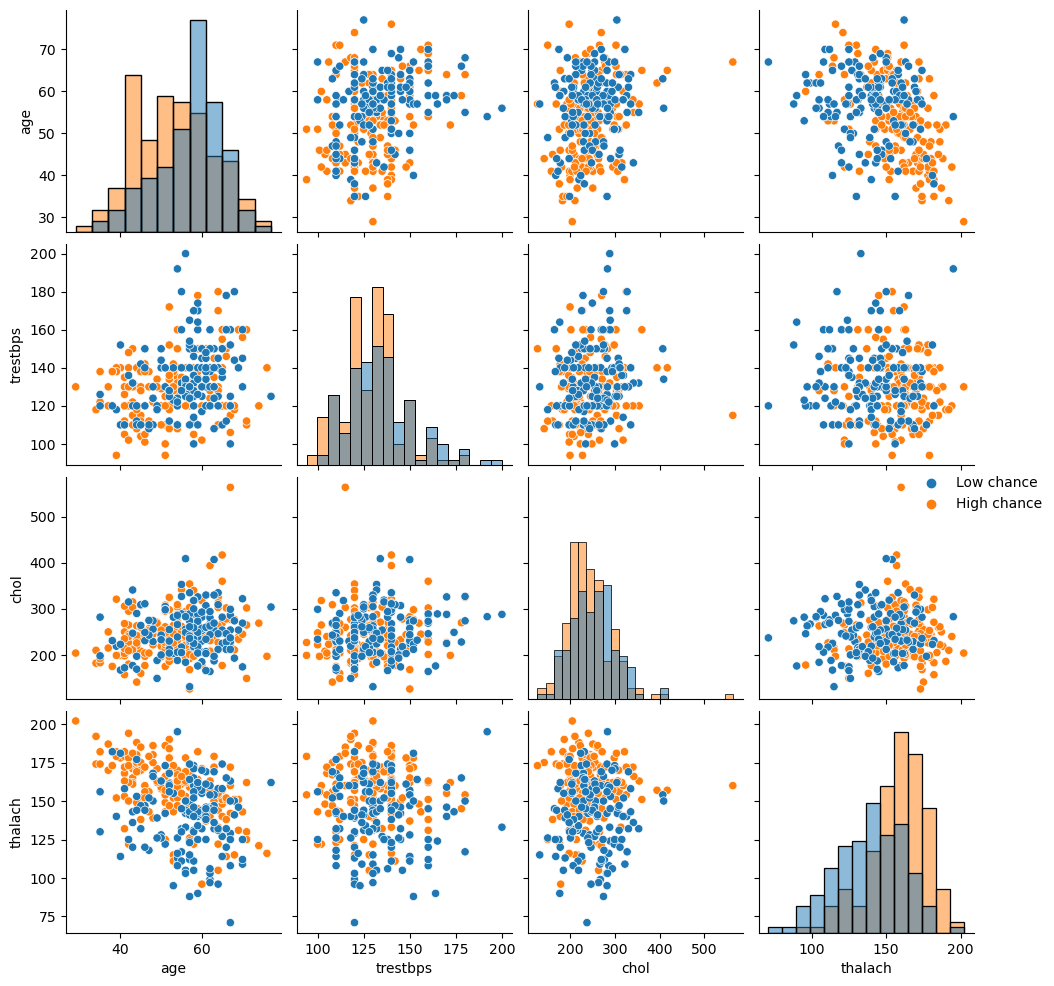

In [4]:
main_pred = ['age', 'trestbps', 'chol',  'thalach', 'target']

plot =sns.pairplot(df[main_pred], hue='target', diag_kind="hist", diag_kws = dict(alpha=.5) );
plot._legend.set_title('')
new_labels = ['Low chance', 'High chance']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

### XGboost

In this part you will build a classifier for the likelihood of having an heart attack using xgboost. You have to train, validate your classifier and print the most meaningful metrics.

In [5]:
import xgboost as xgb
from xgboost import XGBClassifier

predictor = df.drop('target', axis=1).columns

X = df[predictor]
y = df['target']

##TODO split the sample into a training, a test set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.7)

##TODO train a classifier using early stopping and the logloss evaluation metric 
xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train, early_stopping_rounds=50, eval_set = [(X_val,y_val)], eval_metric = 'logloss')

y_pred = xgb_class.predict(X_test)


[0]	validation_0-logloss:0.60544
[1]	validation_0-logloss:0.54374
[2]	validation_0-logloss:0.52767
[3]	validation_0-logloss:0.48720
[4]	validation_0-logloss:0.48106
[5]	validation_0-logloss:0.46626
[6]	validation_0-logloss:0.46731
[7]	validation_0-logloss:0.44180
[8]	validation_0-logloss:0.44543
[9]	validation_0-logloss:0.43741
[10]	validation_0-logloss:0.42960
[11]	validation_0-logloss:0.44398
[12]	validation_0-logloss:0.44075
[13]	validation_0-logloss:0.43397
[14]	validation_0-logloss:0.44224
[15]	validation_0-logloss:0.44476
[16]	validation_0-logloss:0.44208
[17]	validation_0-logloss:0.42804
[18]	validation_0-logloss:0.43608
[19]	validation_0-logloss:0.44133
[20]	validation_0-logloss:0.45334
[21]	validation_0-logloss:0.44659
[22]	validation_0-logloss:0.44866
[23]	validation_0-logloss:0.44213
[24]	validation_0-logloss:0.43867
[25]	validation_0-logloss:0.43934
[26]	validation_0-logloss:0.45207
[27]	validation_0-logloss:0.45940
[28]	validation_0-logloss:0.44712
[29]	validation_0-loglos

Accuracy Score:  0.84375


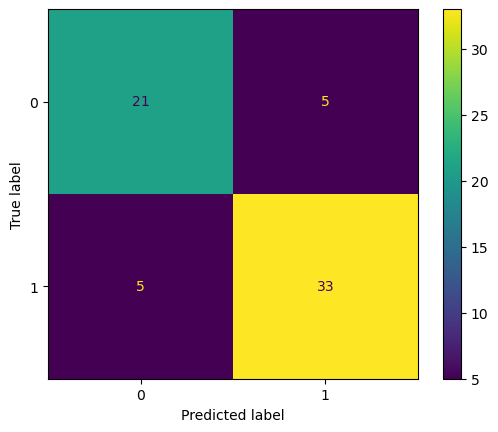

In [6]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

##TODO plot the confusion metrics and calculate the accuracy score

plot_confusion_matrix(xgb_class, X_test, y_test) 
print('Accuracy Score: ', accuracy_score(y_pred, y_test))

**What can you say about the performance of your classifier based on these metrics?**

The accuracy of the model is 79.7%, which is pretty high. Moreover, looking at the confusion matrix there are very few mislabeled observations (13 out of 64, which is 20.3%), so based on these metrics the classifier performs well.

**Which metrics are better suited to evaluate this model? Calculate and visualize these metrics, and comment on the performance of the model.**

Since the two classes are balanced, then accuracy score is already a good metrics to evaluate the classifier. However, given the nature of the problem, the main metric of reference should be recall. The aim of such a classifier should be to predict as many people as possible that are at risk of having an heart attack, to prevent it. Therefore, the main goal should be to minimize the number of individuals prone to heart attacks that are not detected as such (i.e., the number of false negatives).

In [7]:
from sklearn.metrics import (precision_score, recall_score, f1_score, precision_recall_curve,
                             balanced_accuracy_score, roc_curve, auc, roc_auc_score)

print('Recall: ', recall_score(y_pred, y_test))

Recall:  0.868421052631579


**OPTIONAL QUESTION: Suppose that the classifier you built performs very well, would you suggest using it to decide on the allocation of treatments to preent heart attacks?**

The main problem of such a classifier, or in general of most ML algorithms applied in health is that data used to train them come from individuals who go to hospitals or medical centers for some reason. Therefore, these data are likely to be representative of only a certain part of the population, mostly coinciding with people who are already at risk of some disease. Therefore, such classifiers would suffer from the missing counterfactual problem and would not be very reliable.